# Combining Variables

## Working through simple linear regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = range(0,9)
y = (25, 33, 41, 53, 59, 70, 78, 86, 98)

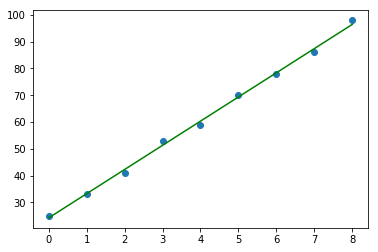

In [2]:
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), 'g-')
plt.show()

In [3]:
print(np.poly1d(p))

 
9.033 x + 24.2


In [4]:
print(np.poly1d(p(6)))

 
78.4


## Advancing to multiple linear regression

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd

i = (0, -1, -3, -4, -5, -7, -8, -9, -11)

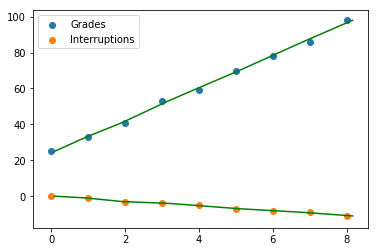

In [6]:
studyData = pd.DataFrame({'Grades': y, 'Interrupt': i})

plt.scatter(x, y)
plt.scatter(x, i)
plt.legend(['Grades', 'Interruptions'])

regress = LinearRegression()
model = regress.fit(studyData, x)
studyData_pred = model.predict(studyData)

plt.plot(studyData_pred, studyData, 'g-')
plt.show()

In [7]:
print(model.predict([[95, -7]]).round(2).item(0))

7.47


In [8]:
print(model.predict([[90, 0], [98, -8]]).round(2))

[6.29 7.86]


## Considering which question to ask

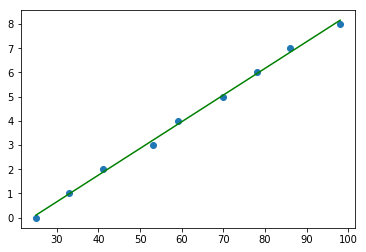

 
7.828


In [9]:
plt.scatter(y, x)

z = np.polyfit(y, x, 1)
p = np.poly1d(z)

plt.plot(y, p(y), 'g-')
plt.show()

print(np.poly1d(p(95)))

## Reducing independent variable complexity

[25 32 38 49 54 63 70 77 87]


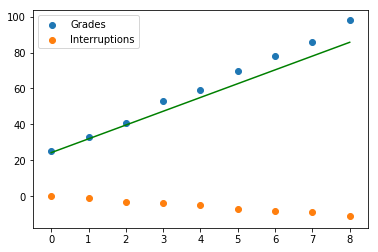

In [10]:
plt.scatter(x, y)
plt.scatter(x, i)
plt.legend(['Grades', 'Interruptions'])

y2 = np.array(y) + np.array(i)
print(y2)

z = np.polyfit(x, y2, 1)
p = np.poly1d(z)

plt.plot(x, p(x), 'g-')
plt.show()

In [11]:
print(np.poly1d(p))
print(np.poly1d(p(6)))

 
7.683 x + 24.27
 
70.37


# Manipulating Categorical Variables

## Checking your version of pandas

In [12]:
import pandas as pd
print(pd.__version__)

0.23.0


## Creating categorical variables

In [13]:
import pandas as pd

car_colors = pd.Series(['Blue', 'Red', 'Green'],
                       dtype='category')

car_data = pd.Series(
    pd.Categorical(
        ['Yellow', 'Green', 'Red', 'Blue', 'Purple'], 
                   categories=car_colors, ordered=False))

find_entries = pd.isnull(car_data)

print(car_colors)
print()
print(car_data)
print()
print(find_entries[find_entries == True])

0     Blue
1      Red
2    Green
dtype: category
Categories (3, object): [Blue, Green, Red]

0      NaN
1    Green
2      Red
3     Blue
4      NaN
dtype: category
Categories (3, object): [Blue, Green, Red]

0    True
4    True
dtype: bool


## Renaming levels

In [14]:
import pandas as pd

car_colors = pd.Series(['Blue', 'Red', 'Green'],
                       dtype='category')
car_data = pd.Series(
    pd.Categorical(
        ['Blue', 'Green', 'Red', 'Blue', 'Red'],
        categories=car_colors, ordered=False))

car_colors.cat.categories = ["Purple", "Yellow", "Mauve"]
car_data.cat.categories = car_colors

print(car_data)

0    Purple
1    Yellow
2     Mauve
3    Purple
4     Mauve
dtype: category
Categories (3, object): [Purple, Yellow, Mauve]


## Combining levels

In [15]:
import pandas as pd

car_colors = pd.Series(['Blue', 'Red', 'Green'],
    dtype='category')
car_data = pd.Series(
    pd.Categorical(
       ['Blue', 'Green', 'Red', 'Green', 'Red', 'Green'],
       categories=car_colors, ordered=False))

car_data = car_data.cat.set_categories(
    ["Blue", "Red", "Green", "Blue_Red"])
print(car_data.loc[car_data.isin(['Red'])])
car_data.loc[car_data.isin(['Red'])] = 'Blue_Red'
car_data.loc[car_data.isin(['Blue'])] = 'Blue_Red'

car_data = car_data.cat.set_categories(
    ["Green", "Blue_Red"])

print()
print(car_data)

2    Red
4    Red
dtype: category
Categories (4, object): [Blue, Red, Green, Blue_Red]

0    Blue_Red
1       Green
2    Blue_Red
3       Green
4    Blue_Red
5       Green
dtype: category
Categories (2, object): [Green, Blue_Red]


# Using Linear Regression to Guess Numbers

## Defining the family of linear models

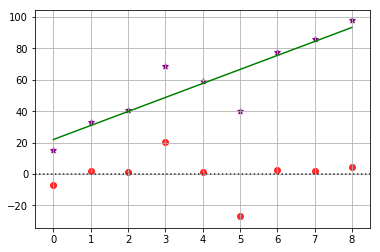

In [16]:
import seaborn

x = range(0,9)
y = (15, 33, 41, 69, 59, 40, 78, 86, 98)

plt.scatter(x, y, color='purple', marker='*')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), 'g-')

seaborn.residplot(np.array(x), np.array(y), color='red')
plt.show()

## Using more variables in a larger dataset

### Using the Boston dataset

In [17]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
boston = load_boston()
X = scale(boston.data)
y = boston.target

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(normalize=True)
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Checking the fit using R2

In [20]:
print(regression.score(X, y))

0.7406077428649428


### Considering the coefficients

In [21]:
print([a + ':' + str(round(b, 2)) for a, b in zip(
    boston.feature_names, regression.coef_,)])

['CRIM:-0.92', 'ZN:1.08', 'INDUS:0.14', 'CHAS:0.68', 'NOX:-2.06', 'RM:2.67', 'AGE:0.02', 'DIS:-3.1', 'RAD:2.66', 'TAX:-2.08', 'PTRATIO:-2.06', 'B:0.86', 'LSTAT:-3.75']


## Doing variable transformations

### Considering the effect of ordering

In [22]:
from sklearn.datasets import load_boston
import random
from random import shuffle

boston = load_boston()
random.seed(0) # Creates a replicable shuffling
new_index = list(range(boston.data.shape[0]))
shuffle(new_index) # shuffling the index
X, y = boston.data[new_index], boston.target[new_index]
print(X.shape, y.shape, boston.feature_names)

(506, 13) (506,) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Storing the Boston database in a DataFrame

In [23]:
import pandas as pd
df = pd.DataFrame(X,columns=boston.feature_names)
df['target'] = y

### Looking for transformations

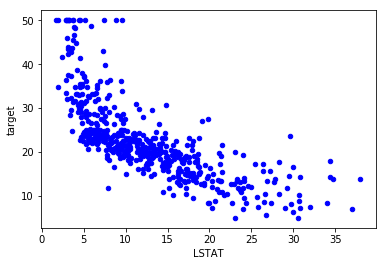

In [24]:
ax = df.plot(kind='scatter', x='LSTAT', y='target', c='b')

In [25]:
import numpy as np
from sklearn.feature_selection import f_regression

single_variable = df['LSTAT'].values.reshape(-1, 1)
F, pval = f_regression(single_variable, y)
print('F score for the original feature %.1f' % F)
F, pval = f_regression(np.log(single_variable),y)
print('F score for the transformed feature %.1f' % F)

F score for the original feature 601.6
F score for the transformed feature 1000.2


## Creating interactions between variables

### Detecting interactions

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
regression = LinearRegression(normalize=True)
crossvalidation = KFold(n_splits=10, shuffle=True,
                        random_state=1)

In [27]:
df = pd.DataFrame(X,columns=boston.feature_names)
baseline = np.mean(cross_val_score(regression, df, y, 
                                   scoring='r2', 
                                   cv=crossvalidation))
interactions = list()
for var_A in boston.feature_names:
    for var_B in boston.feature_names:
        if var_A > var_B:
            df['interaction'] = df[var_A] * df[var_B]
            cv = cross_val_score(regression, df, y, 
                                 scoring='r2', 
                                 cv=crossvalidation)
            score = round(np.mean(cv), 3)
            if score > baseline:
                interactions.append((var_A, var_B, score))
print('Baseline R2: %.3f' % baseline)
print('Top 10 interactions: %s' % sorted(interactions, 
                                    key=lambda x :x[2], 
                                    reverse=True)[:10])

Baseline R2: 0.716
Top 10 interactions: [('RM', 'LSTAT', 0.79), ('TAX', 'RM', 0.782), ('RM', 'RAD', 0.778), ('RM', 'PTRATIO', 0.766), ('RM', 'INDUS', 0.76), ('RM', 'NOX', 0.747), ('RM', 'AGE', 0.742), ('RM', 'B', 0.738), ('RM', 'DIS', 0.736), ('ZN', 'RM', 0.73)]


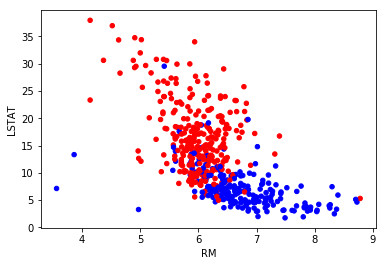

In [28]:
colors = ['b' if v > np.mean(y) else 'r' for v in y]
scatter = df.plot(kind='scatter', x='RM', y='LSTAT', 
                  c=colors) 

### Putting the interaction data to use

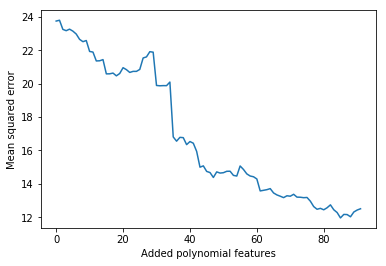

In [29]:
polyX = pd.DataFrame(X,columns=boston.feature_names)
cv = cross_val_score(regression, polyX, y, 
                     scoring='neg_mean_squared_error', 
                     cv=crossvalidation)
baseline = np.mean(cv)
improvements = [baseline]
for var_A in boston.feature_names: 
    polyX[var_A+'^2'] = polyX[var_A]**2
    cv = cross_val_score(regression, polyX, y, 
                         scoring='neg_mean_squared_error', 
                         cv=crossvalidation)
    improvements.append(np.mean(cv))
    for var_B in boston.feature_names:
        if var_A > var_B:
            poly_var = var_A + '*' + var_B
            polyX[poly_var] = polyX[var_A] * polyX[var_B]
            cv = cross_val_score(regression, polyX, y, 
                         scoring='neg_mean_squared_error', 
                         cv=crossvalidation)
            improvements.append(np.mean(cv))
import matplotlib.pyplot as plt
plt.figure() 
plt.plot(range(0,92),np.abs(improvements),'-')
plt.xlabel('Added polynomial features')
plt.ylabel('Mean squared error')
plt.show()

In [30]:
print('New shape of X:', np.shape(polyX))
crossvalidation = KFold(n_splits=10, shuffle=True, 
                        random_state=1)
cv = cross_val_score(regression, polyX, y, 
                     scoring='neg_mean_squared_error', 
                     cv=crossvalidation)
print('Mean squared error: %.3f' % abs(np.mean(cv)))

New shape of X: (506, 104)
Mean squared error: 12.514


# Learning One Example at a Time

## Implementing Stochastic Gradient Descent

### Using the fit() method

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

SGD = SGDRegressor(loss='squared_loss', 
                   penalty='l2', 
                   alpha=0.0001, 
                   l1_ratio=0.15, 
                   max_iter=2000,
                   random_state=1)
scaling = StandardScaler()
scaling.fit(polyX)
scaled_X = scaling.transform(polyX)
cv = cross_val_score(SGD, scaled_X, y, 
         scoring='neg_mean_squared_error', 
         cv=crossvalidation)
score = abs(np.mean(cv))
print('CV MSE: %.3f' % score)

CV MSE: 12.179


### Using the partial_fit() method

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(scaled_X, y, 
                                        test_size=0.20, 
                                        random_state=2)
SGD = SGDRegressor(loss='squared_loss', 
                   penalty='l2', 
                   alpha=0.0001, 
                   l1_ratio=0.15, 
                   max_iter=2000,
                   random_state=1)
improvements = list()
for z in range(10000):
    SGD.partial_fit(X_tr, y_tr)
    score = mean_squared_error(y_t, SGD.predict(X_t))
    improvements.append(score)

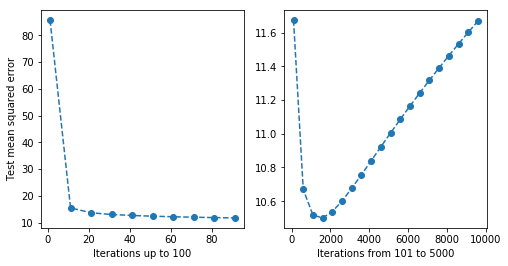

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
range_1 = range(1,101,10)
score_1 = np.abs(improvements[:100:10])
plt.plot(range_1, score_1,'o--')
plt.xlabel('Iterations up to 100')
plt.ylabel('Test mean squared error')
plt.subplot(1,2,2)
range_2 = range(100,10000,500)
score_2 = np.abs(improvements[100:10000:500])
plt.plot(range_2, score_2,'o--')
plt.xlabel('Iterations from 101 to 5000')
plt.show()